# Lab : Image Classification using Convolutional Neural Networks

At the end of this laboratory, you would get familiarized with

*   Creating deep networks using Keras
*   Steps necessary in training a neural network
*   Prediction and performance analysis using neural networks

---

# **In case you use a colaboratory environment**
By default, Colab notebooks run on CPU.
You can switch your notebook to run with GPU.

In order to obtain access to the GPU, you need to choose the tab Runtime and then select “Change runtime type” as shown in the following figure:

![Changing runtime](https://miro.medium.com/max/747/1*euE7nGZ0uJQcgvkpgvkoQg.png)

When a pop-up window appears select GPU. Ensure “Hardware accelerator” is set to GPU.

# **Working with a new dataset: CIFAR-10**

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. More information about CIFAR-10 can be found [here](https://www.cs.toronto.edu/~kriz/cifar.html).

In Keras, the CIFAR-10 dataset is also preloaded in the form of four Numpy arrays. x_train and y_train contain the training set, while x_test and y_test contain the test data. The images are encoded as Numpy arrays and their corresponding labels ranging from 0 to 9.

Your task is to:

*   Visualize the images in CIFAR-10 dataset. Create a 10 x 10 plot showing 10 random samples from each class.
*   Convert the labels to one-hot encoded form.
*   Normalize the images.




In [8]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical





# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

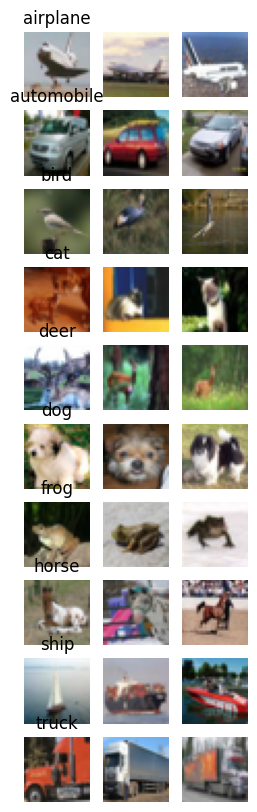

In [9]:
# Visualize 3 random samples from each class
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10, 10))
for i in range(10):
    indices = np.where(y_train == i)[0]
    random_indices = np.random.choice(indices, 10,replace=False)
    for j in range(3):
        plt.subplot(10, 10, i * 10 + j + 1)
        plt.imshow(x_train[random_indices[j]])
        plt.axis('off')
        if j == 0:
            plt.title(class_names[i])
plt.show()

## Define the following model (same as the one in tutorial)

For the convolutional front-end, start with a single convolutional layer with a small filter size (3,3) and a modest number of filters (32) followed by a max pooling layer.

Use the input as (32,32,3).

The filter maps can then be flattened to provide features to the classifier.

Use a dense layer with 100 units before the classification layer (which is also a dense layer with softmax activation).

In [10]:
from keras.backend import clear_session
clear_session()

In [11]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [12]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(100, activation='relu'),
    Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 7200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       720,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 722,006 (2.75 MB)

 Trainable params: 722,006 (2.75 MB)

 Non-trainable params: 0 (0.00 B)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [13]:
# If you want to keep integer labels (0-9), use sparse_categorical_crossentropy
model.compile(loss='sparse_categorical_crossentropy',  # Changed here
             optimizer='SGD',
             metrics=['accuracy'])

# Now you can use original y_train (integer labels)
history = model.fit(x_train, y_train, batch_size=512, epochs=50, validation_split=0.1)

Epoch 1/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.0989 - loss: 2742.6633 - val_accuracy: 0.0970 - val_loss: 2.3030
Epoch 2/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0997 - loss: 2.3037 - val_accuracy: 0.0956 - val_loss: 2.3027
Epoch 3/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1010 - loss: 2.3062 - val_accuracy: 0.0954 - val_loss: 2.3026
Epoch 4/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0989 - loss: 2.3031 - val_accuracy: 0.0954 - val_loss: 2.3026
Epoch 5/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1009 - loss: 2.3026 - val_accuracy: 0.0954 - val_loss: 2.3026
Epoch 6/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1004 - loss: 2.3026 - val_accuracy: 0.0954 - val_loss: 2.3027
Epoch 7/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1017 - loss: 2.3026 - val_accuracy: 0.0954 - val_loss: 2.3027
Epoch 8/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1024 - loss: 2.3026 - val_accuracy: 0.0954 - val_l

*   Plot the cross entropy loss curve and the accuracy curve

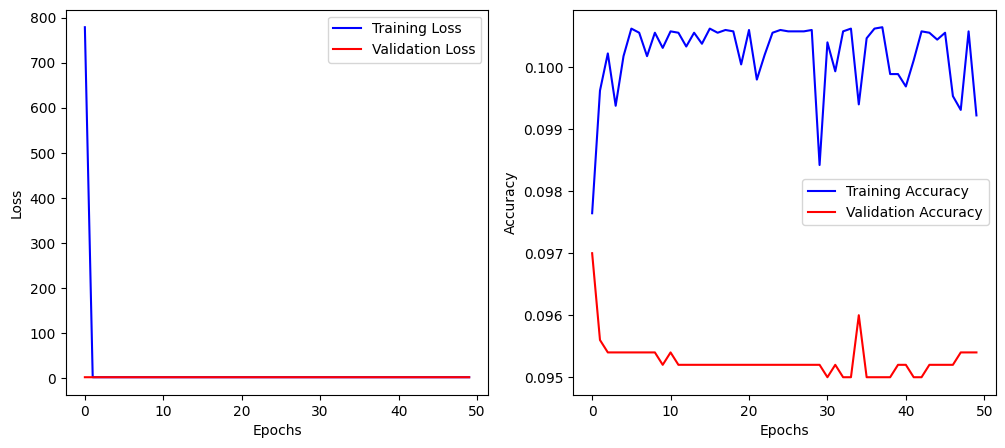

In [14]:
# Create subplots
plt.figure(figsize=(12, 5))

# Plot Loss Curve
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='Training Loss')
plt.plot(history.history['val_loss'],'r-', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'b-', label='Training Accuracy')
plt.plot(history.history['val_accuracy'],'r-', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Defining Deeper Architectures: VGG Models

*   Define a deeper model architecture for CIFAR-10 dataset and train the new model for 50 epochs with a batch size of 512. We will use VGG model as the architecture.

Stack two convolutional layers with 32 filters, each of 3 x 3.

Use a max pooling layer and next flatten the output of the previous layer and add a dense layer with 128 units before the classification layer.

For all the layers, use ReLU activation function.

Use same padding for the layers to ensure that the height and width of each layer output matches the input


In [15]:
from keras.backend import clear_session
clear_session()

In [16]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    Conv2D(32, (3,3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2,2)),

#secend layer
    Conv2D(64, (3,3), activation='relu', padding='same'),
    Conv2D(64, (3,3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')

])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 591,274 (2.26 MB)

 Trainable params: 591,274 (2.26 MB)

 Non-trainable params: 0 (0.00 B)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [18]:
model.compile(loss='sparse_categorical_crossentropy',  # Changed loss function
             optimizer='SGD',
             metrics=['accuracy'])

# Now you can use integer labels directly
history2 = model.fit(x_train, y_train,
                   batch_size=512,
                   epochs=50,
                   validation_split=0.1)

Epoch 1/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 18s 123ms/step - accuracy: 0.1016 - loss: nan - val_accuracy: 0.1024 - val_loss: nan
Epoch 2/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.0983 - loss: nan - val_accuracy: 0.1024 - val_loss: nan
Epoch 3/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.0990 - loss: nan - val_accuracy: 0.1024 - val_loss: nan
Epoch 4/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.1017 - loss: nan - val_accuracy: 0.1024 - val_loss: nan
Epoch 5/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.1008 - loss: nan - val_accuracy: 0.1024 - val_loss: nan
Epoch 6/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.0967 - loss: nan - val_accuracy: 0.1024 - val_loss: nan
Epoch 7/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.0992 - loss: nan - val_accuracy: 0.1024 - val_loss: nan
Epoch 8/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.1006 - loss: nan - val_accuracy: 0.1024 - val_loss: nan
Epoch 9/50
88/88 ━━━━━━━━━━━━━━━━━━━━

*   Compare the performance of both the models by plotting the loss and accuracy curves of both the training steps. Does the deeper model perform better? Comment on the observation.


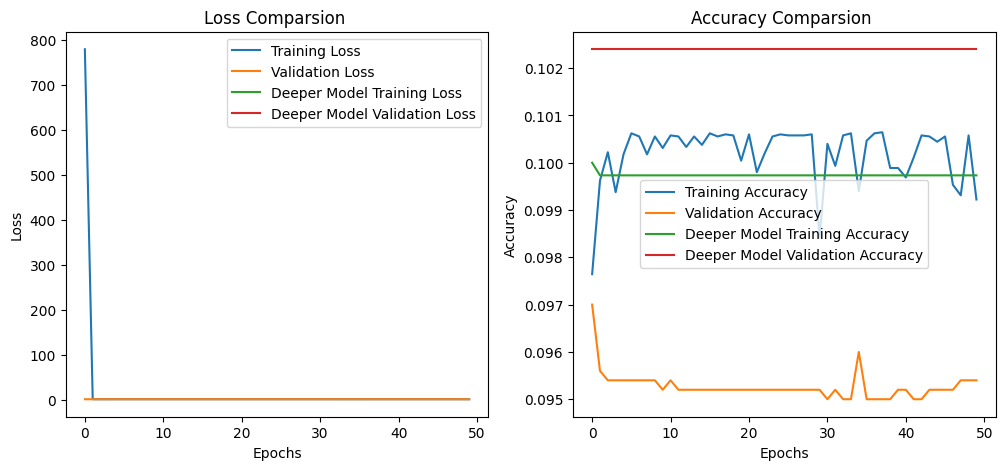

In [19]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history2.history['loss'], label='Deeper Model Training Loss')
plt.plot(history2.history['val_loss'], label='Deeper Model Validation Loss')
plt.title("Loss Comparsion ")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history2.history['accuracy'], label='Deeper Model Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='Deeper Model Validation Accuracy')
plt.title("Accuracy Comparsion ")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

**Comment on the observation**

*(Double-click or enter to edit)*

...

*   Use predict function to predict the output for the test split
*   Plot the confusion matrix for the new model and comment on the class confusions.


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


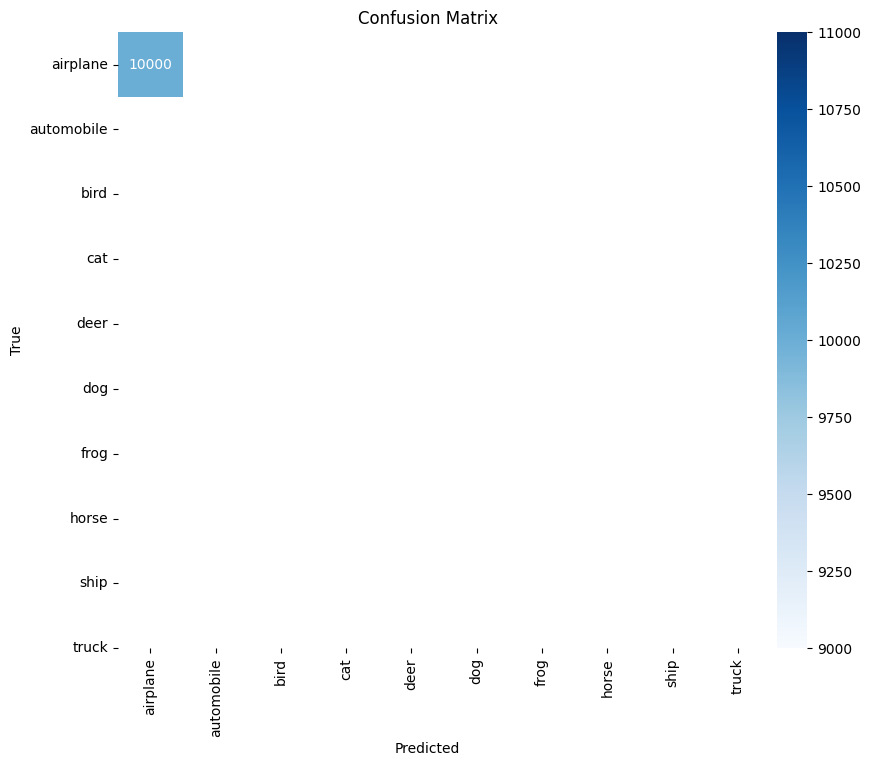

In [20]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

predictions = model.predict(x_test, batch_size=512)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)

cm = confusion_matrix(true_labels, predicted_labels)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

**Comment here :**

*(Double-click or enter to edit)*

...

*    Print the test accuracy for the trained model.

In [21]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.1019 - loss: nan
Test Accuracy: 0.10000000149011612


## Define the complete VGG architecture.

Stack two convolutional layers with 64 filters, each of 3 x 3 followed by max pooling layer.

Stack two more convolutional layers with 128 filters, each of 3 x 3, followed by max pooling, followed by two more convolutional layers with 256 filters, each of 3 x 3, followed by max pooling.

Flatten the output of the previous layer and add a dense layer with 128 units before the classification layer.

For all the layers, use ReLU activation function.

Use same padding for the layers to ensure that the height and width of each layer output matches the input

*   Change the size of input to 64 x 64.

In [23]:
from keras.backend import clear_session
clear_session()

In [25]:
model = Sequential([
    Conv2D(64, (3, 3), activation = 'relu', padding='same', input_shape=(64, 64, 3)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation = 'relu', padding='same'),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(2, 2),

    Conv2D(256, (3, 3), activation = 'relu', padding='same'),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')

])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 64, 64, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     2,097,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,243,978 (12.37 MB)

 Trainable params: 3,243,978 (12.37 MB)

 Non-trainable params: 0 (0.00 B)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 10 epochs with a batch size of 512.
*   Predict the output for the test split and plot the confusion matrix for the new model and comment on the class confusions.

In [27]:
import cv2

In [28]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Resize the images to 64x64
x_train_resized = np.array([cv2.resize(img, (64, 64)) for img in x_train])
x_test_resized = np.array([cv2.resize(img, (64, 64)) for img in x_test])

y_train_resized = to_categorical(y_train, num_classes=10)
y_test_resized = to_categorical(y_test, num_classes=10)

# Normalizing the data
x_train_resized = x_train_resized / 255.0
x_test_resized = x_test_resized / 255.0

In [29]:
model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])
history3 = model.fit(x_train_resized, y_train_resized, epochs=10, batch_size=512, validation_data=(x_test_resized, y_test_resized))

Epoch 1/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 37s 230ms/step - accuracy: 0.1026 - loss: 2.3007 - val_accuracy: 0.1085 - val_loss: 2.2953
Epoch 2/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - accuracy: 0.1147 - loss: 2.2917 - val_accuracy: 0.1292 - val_loss: 2.2713
Epoch 3/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - accuracy: 0.1590 - loss: 2.2458 - val_accuracy: 0.2673 - val_loss: 2.1055
Epoch 4/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - accuracy: 0.2406 - loss: 2.1065 - val_accuracy: 0.2759 - val_loss: 2.0272
Epoch 5/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - accuracy: 0.2844 - loss: 2.0100 - val_accuracy: 0.3237 - val_loss: 1.9184
Epoch 6/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - accuracy: 0.3210 - loss: 1.9321 - val_accuracy: 0.3024 - val_loss: 1.8999
Epoch 7/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - accuracy: 0.3332 - loss: 1.8884 - val_accuracy: 0.3266 - val_loss: 1.8945
Epoch 8/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - accuracy: 0.3530 - loss: 1.8291 - val_accuracy: 0.3630 -

# Understanding deep networks

*   What is the use of activation functions in network? Why is it needed?
*   We have used softmax activation function in the exercise. There are other activation functions available too. What is the difference between sigmoid activation and softmax activation?
*   What is the difference between categorical crossentropy and binary crossentropy loss?

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step


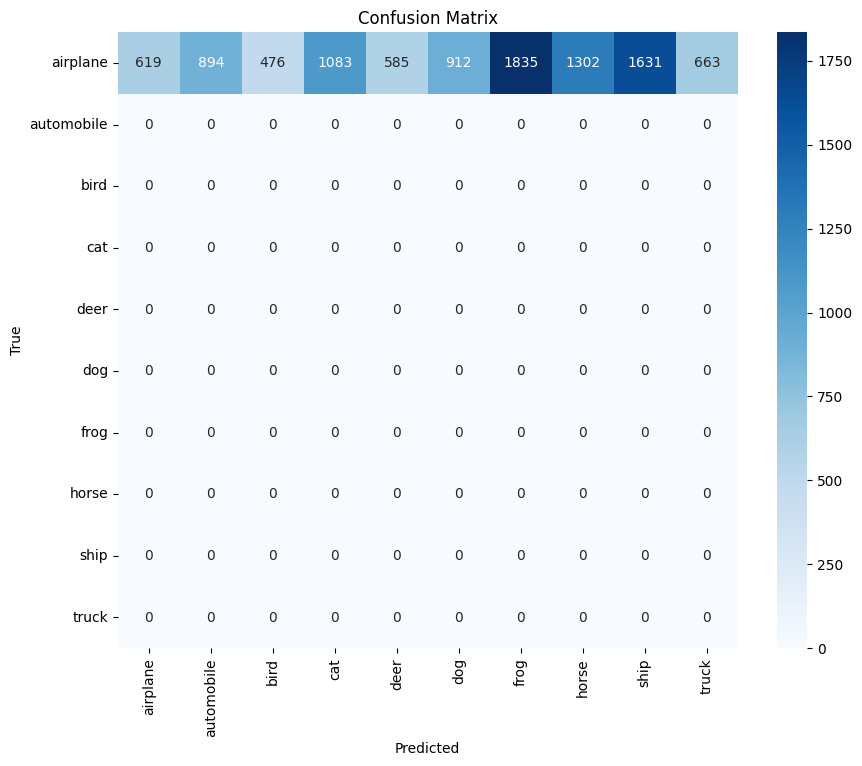

In [30]:
predictions = model.predict(x_test_resized, batch_size=512)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)

cm = confusion_matrix(true_labels, predicted_labels)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

**Write the answers below :**

1 - Use of activation functions:

Activation functions introduce non-linearity into neural networks, allowing them to learn complex patterns. Without them, deep networks would just compute linear transformations, no matter how many layers they have. They also help normalize outputs (e.g., squashing values between 0 and 1 for sigmoid or converting logits to probabilities for softmax).

_

2 - Key Differences between sigmoid and softmax:

| Feature        | Sigmoid                          | Softmax                          |
|----------------|----------------------------------|----------------------------------|
| Purpose        | Binary classification / multi-label | Multi-class classification      |
| Output         | Independent probabilities (0 to 1) | Probabilities sum to 1          |
| Example        | Is this image a cat? (yes/no)    | Is this digit 0, 1, 2, ..., 9?   |
| Math           | σ(x) = 1 / (1 + e^{-x})          | softmax(x_i) = e^{x_i} / ∑ e^{x_j} |

Key Difference:
- Sigmoid: Used when classes are independent (e.g., multiple labels possible).
- Softmax: Used when classes are mutually exclusive (only one true label).


_

3 - Key Differences between categorical crossentropy and binary crossentropy loss:

| Feature        | Binary Cross-Entropy (BCE)       | Categorical Cross-Entropy (CCE)  |
|----------------|----------------------------------|----------------------------------|
| Use Case       | Binary/multi-label classification | Multi-class classification      |
| Output Handling| Each class treated independently | Probabilities sum to 1          |
| Example        | Detecting diseases (multiple possible) | MNIST digit classification (0-9) |
| Formula        | −(y log(p) + (1−y) log(1−p))     | −∑ y log(p) (one-hot encoded)    |

Key Difference:
- BCE: For independent outputs (e.g., multi-label).
- CCE: For single-class classification (one-hot encoded).
_


###**Summary**
1. Activation Functions: Add non-linearity (ReLU, sigmoid, softmax).
2. Sigmoid: Independent probabilities. Softmax: Probability distribution.
3. BCE: Independent losses. CCE: Single-class loss.